# b) Logistic Regression

# Program 1 - Preprocessing and implementing Logistic Regression on titanic dataset using Scikit learn

# Part 1 - Importing modules and Loading dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('C:/datasets/titanic.csv')
titanic_df.head()
     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Part 2 - Visualizing the dataset

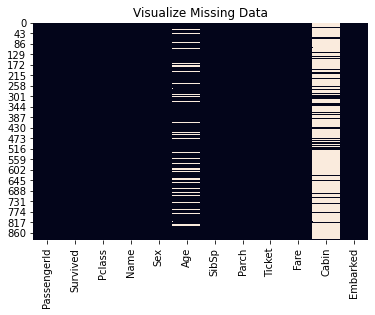

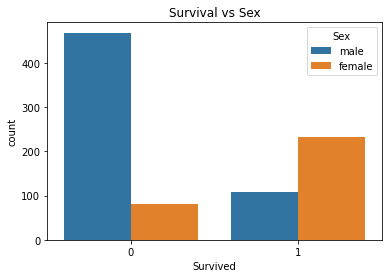

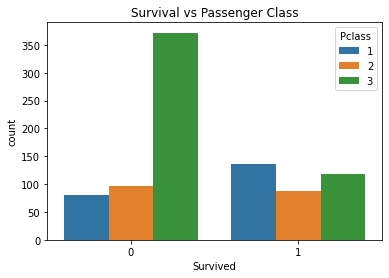

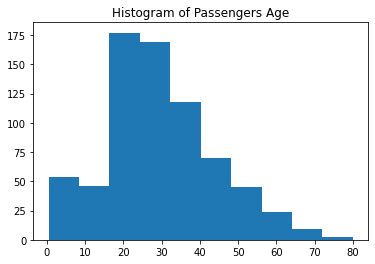

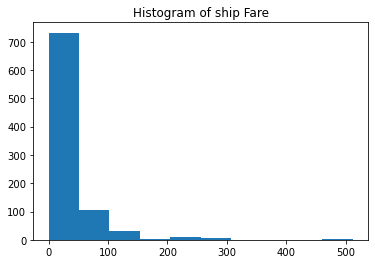

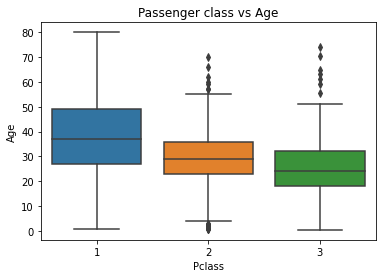

In [6]:
def plot(title,plot_func,*args,**kwargs):
    plt.title(title)
    plot_func(*args,**kwargs)
    plt.show()

plot('Visualize Missing Data',
   sns.heatmap,titanic_df.isnull(), cbar=False)
plot("Survival vs Sex",
    sns.countplot,x='Survived', hue='Sex', data=titanic_df)
plot("Survival vs Passenger Class",
    sns.countplot,x='Survived', hue='Pclass', data=titanic_df)
plot("Histogram of Passengers Age",
    plt.hist,titanic_df["Age"].dropna())
plot("Histogram of ship Fare",
    plt.hist,titanic_df['Fare'])
plot("Passenger class vs Age",
    sns.boxplot,x='Pclass', y='Age',data=titanic_df)

# Part 3 - Dealing with missing,categorial and irrevalent data

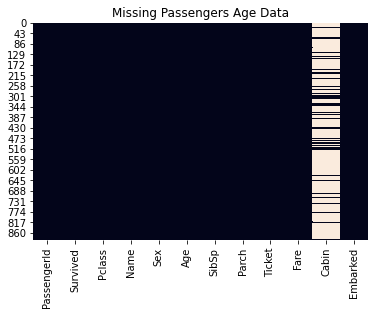

In [8]:
mean_ages = {
    p_class:titanic_df[titanic_df["Pclass"]==p_class]["Age"].mean()
    for p_class in titanic_df["Pclass"].unique()
}
def impute_missing_age(columns):
    age , p_class = columns
    if pd.isnull(age):
        return mean_ages[p_class]
    return age
titanic_df['Age'] = titanic_df[['Age', 'Pclass']].apply(
    impute_missing_age,axis = 1
)
plot("Missing Passengers Age Data",
    sns.heatmap,titanic_df.isnull(), cbar=False)

In [9]:
titanic_df.drop('Cabin', axis=1, inplace = True)
titanic_df.dropna(inplace = True)
sex_data = pd.get_dummies(titanic_df['Sex'], drop_first = True)
embarked_data = pd.get_dummies(titanic_df['Embarked'], drop_first = True)
titanic_df = pd.concat([titanic_df, sex_data, embarked_data], axis = 1)
titanic_df.drop(
    ['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'],
    axis = 1, inplace = True
)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Part 4 - Implementing Logistic Regression using Scikit learn

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import minmax_scale

titanic_df[["Age","Fare"]] = minmax_scale(titanic_df[["Age","Fare"]])

X = titanic_df.drop('Survived', axis = 1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size = 0.3)
)
model = LogisticRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

def print_title(title):print(f"{title:^50}\n{'='*50}")
    
print_title("Classification Report")
print(classification_report(y_test, y_hat))
print_title("Confusion Matrix")
print(confusion_matrix(y_test, y_hat))

              Classification Report               
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       154
           1       0.83      0.72      0.77       113

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.81       267

                 Confusion Matrix                 
[[137  17]
 [ 32  81]]


# Program 2 - Logistic regression for diabetes prediction(From scratch vs using Scikit learn

# Part 1 - Defining class for Logistic Regression

In [24]:
import numpy as np
import pandas as pd
class LogitRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    def p(self,X):
        return 1/(1+np.exp(-(X @ self.w)))
    def fit(self, X, y):
        m,n = X.shape
        X = np.hstack([np.ones((m,1)),X])
        y = y.squeeze()
        self.w = np.zeros(n+1)
        
        for i in range(self.iterations):
            self.w = self.w - self.learning_rate * ((self.p(X)-y) @ X)
    def predict(self,X):
        m = X.shape[0]
        X = np.hstack([np.ones((m,1)),X])
        y_hat = np.where(self.p(X) > 0.5, 1, 0)
        return y_hat

# Part 2 - Loading and Processing Dataset

In [25]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
     


diabetes_df = pd.read_csv( "C:/datasets/diabetes.csv" )
X = minmax_scale(diabetes_df.iloc[:,:-1].values)
y = diabetes_df.iloc[:,-1:].values.reshape(-1)
X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size = 1/3, random_state =6
)

# Part 3 - Comparing Models

In [26]:
models = [
    LogitRegression(learning_rate = .1, iterations = 1000),
    LogisticRegression()
]
for model in models:
    model.fit(X_train,y_train)
    
def compute_accuracy(model,X_test,y_test):
    y_hat = model.predict(X_test)
    return (y_hat==y_test).mean() * 100 

print("Accuracy on test set by our implementation of Logistic Reg model :",
    compute_accuracy(models[0],X_test,y_test)
)
print("Accuracy on test set by sklearn model :",
    compute_accuracy(models[1],X_test,y_test) 
)
     

Accuracy on test set by our implementation of Logistic Reg model : 64.0625
Accuracy on test set by sklearn model : 78.515625
